In [ ]:
pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 463 kB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 60.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab202207

In [ ]:
pip install tensorflow-quantum==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.5 MB 5.2 MB/s 
     |████████████████████████████████| 576 kB 44.1 MB/s 
     |████████████████████████████████| 100 kB 5.8 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 90 kB 677 kB/s 
     |████████████████████████████████| 1.6 MB 22.7 MB/s 
     |████████████████████████████████| 6.1 MB 28.4 MB/s 
     |████████████████████████████████| 641 kB 45.8 MB/s 
     |████████████████████████████████| 541 kB 45.0 MB/s 
     |████████████████████████████████| 541 kB 39.3 MB/s 
     |████████████████████████████████| 437 kB 50.6 MB/s 
     |████████████████████████████████| 115 kB 44.8 MB/s 
     |████████████████████████████████| 93 kB 1.8 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93

In [ ]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

In [ ]:
import tensorflow_quantum as tfq
import tensorflow as tf
import cirq
import sympy
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files

Loading Data

In [ ]:
#1. Blobs (Classification)
blob_x, blob_y = datasets.make_blobs(500, centers=7, shuffle=True)
blob_x = MinMaxScaler().fit_transform(blob_x)

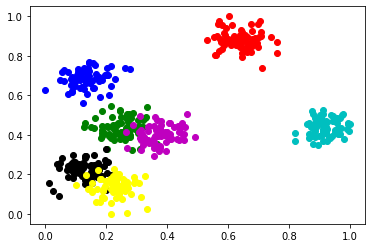

In [ ]:
plt.scatter(blob_x[blob_y == 0][:,0], blob_x[blob_y == 0][:,1], label='0', color='blue')
plt.scatter(blob_x[blob_y == 1][:,0], blob_x[blob_y == 1][:,1], label='1', color='red')
plt.scatter(blob_x[blob_y == 2][:,0], blob_x[blob_y == 2][:,1], label='2', color='green')
plt.scatter(blob_x[blob_y == 3][:,0], blob_x[blob_y == 3][:,1], label='3', color='black')
plt.scatter(blob_x[blob_y == 4][:,0], blob_x[blob_y == 4][:,1], label='4', color='yellow')
plt.scatter(blob_x[blob_y == 5][:,0], blob_x[blob_y == 5][:,1], label='5', color='m')
plt.scatter(blob_x[blob_y == 6][:,0], blob_x[blob_y == 6][:,1], label='6', color='c')
plt.show()

In [ ]:
blobx_train, blobx_test, bloby_train, bloby_test = train_test_split(blob_x, blob_y, test_size=.2, random_state=1)

In [ ]:
#2. Iris Plants (Classification)
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target
iris_x = MinMaxScaler().fit_transform(iris_x)

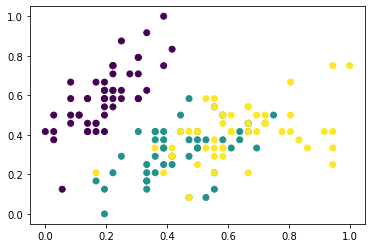

In [ ]:
plt.scatter(x=iris_x[:,0], y=iris_x[:,1], c=iris_y, cmap='viridis')

In [ ]:
irisx_train, irisx_test, irisy_train, irisy_test = train_test_split(iris_x, iris_y, test_size=.2)

In [ ]:
#3. California Housing Prices (Regression)
houses = datasets.fetch_california_housing()
houses_x = houses.data
houses_x = MinMaxScaler().fit_transform(houses_x)
houses_y = houses.target
houses_y = (houses_y - np.min(houses_y)) / (np.max(houses_y) - np.min(houses_y))

In [ ]:
housesx_train, housesx_test, housesy_train, housesy_test = train_test_split(houses_x, houses_y, test_size=.2, random_state=4)

Classical Neural Network

In [ ]:
output = 1
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 3e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)
epochs = 100
batch_size = 32

for i in range(1):
  classical_NN = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(output)
  ])

  classical_NN.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

  history = classical_NN.fit(housesx_train, housesy_train, epochs=epochs, batch_size=batch_size, validation_data=(housesx_test, housesy_test), callbacks=[callback])
  #cmap_light = ListedColormap(['midnightblue', 'maroon', 'forestgreen'])
  #N = 400
  #x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
  #transformed = np.c_[x1.ravel(), x2.ravel()]
  #z = classical_NN(transformed)

  #z = np.asarray(z)
  #z = np.argmax(z, axis=1)
  #z = z.reshape(x1.shape)
  #plt.pcolormesh(x1, x2, z, cmap=cmap_light)
  plt.plot(history.history['loss'], label='Classical Training Loss')
  plt.plot(history.history['val_loss'], label='Classical Validation Loss')
  plt.legend()
  plt.show()
  plt.savefig("california_housing")

In [ ]:
x, y = datasets.fetch_california_housing(return_X_y=True)
x = MinMaxScaler().fit_transform(x)
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Classical NN
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=43)

blob_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
blob_nn.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=3e-3))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

c_history = blob_nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

Quantum Neural Network


In [ ]:
def convert_data(data, qubits, test=False):
    cs = []
    for i in data:
        cir = cirq.Circuit()
        for j in qubits:
            cir += cirq.rx(i[0] * np.pi).on(j)
            cir += cirq.ry(i[1] * np.pi).on(j)
        cs.append(cir)
    if test:
        return tfq.convert_to_tensor([cs])
    return tfq.convert_to_tensor(cs)

def encode(data, labels, qubits):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=4)
    return convert_data(X_train, qubits), convert_data(X_test, qubits), y_train, y_test

def layer(circuit, qubits, params):
    for i in range(len(qubits)):
        if i + 1 < len(qubits):
            circuit += cirq.CNOT(qubits[i], qubits[i + 1])
        circuit += cirq.ry(params[i * 2]).on(qubits[i])
        circuit += cirq.rz(params[i * 2 + 1]).on(qubits[i])
    return circuit

def model_circuit(qubits, depth):
    cir = cirq.Circuit()
    num_params = depth * 2 * len(qubits)
    params = sympy.symbols("q0:%d"%num_params)
    for i in range(depth):
        cir = layer(cir, qubits, params[i * 2 * len(qubits):i * 2 * len(qubits) + 2 * len(qubits)])
    return cir


Epoch 1/25
516/516 [==============================] - 2s 3ms/step - loss: 0.0290 - acc: 0.0373 - val_loss: 0.0209 - val_acc: 0.0371
Epoch 2/25
516/516 [==============================] - 1s 2ms/step - loss: 0.0209 - acc: 0.0410 - val_loss: 0.0200 - val_acc: 0.0373
Epoch 3/25
516/516 [==============================] - 1s 2ms/step - loss: 0.0196 - acc: 0.0412 - val_loss: 0.0206 - val_acc: 0.0361
Epoch 4/25
516/516 [==============================] - 1s 2ms/step - loss: 0.0195 - acc: 0.0414 - val_loss: 0.0193 - val_acc: 0.0395
Epoch 5/25
516/516 [==============================] - 1s 3ms/step - loss: 0.0190 - acc: 0.0417 - val_loss: 0.0188 - val_acc: 0.0395
Epoch 6/25
516/516 [==============================] - 1s 2ms/step - loss: 0.0186 - acc: 0.0417 - val_loss: 0.0202 - val_acc: 0.0368
Epoch 7/25
516/516 [==============================] - 1s 2ms/step - loss: 0.0184 - acc: 0.0419 - val_loss: 0.0188 - val_acc: 0.0402
Epoch 8/25
516/516 [==============================] - 1s 2ms/step - loss: 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

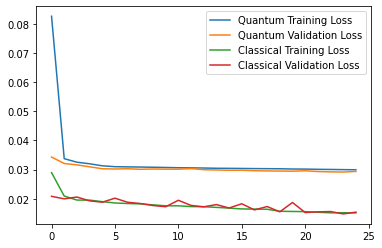

In [ ]:
output = 1
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 3e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)
epochs = 25
batch_size = 32


classical_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output)
])

classical_NN.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

nn_history = classical_NN.fit(housesx_train, housesy_train, epochs=epochs, batch_size=batch_size, validation_data=(housesx_test, housesy_test), callbacks=[callback])

qs = [cirq.GridQubit(0, i) for i in range(8)]
d = 3
X_train, X_test, y_train, y_test = encode(houses_x, houses_y, qs)
c = model_circuit(qs, d)
print(c)

readout_operators = [cirq.Z(qs[0])]
inputs = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
#layer1 = tfq.layers.PQC(c, readout_operators, repetitions=32, differentiator=tfq.differentiators.ParameterShift())(inputs)
layer1 = tfq.layers.PQC(c, readout_operators, differentiator=tfq.differentiators.Adjoint())(inputs)
vqc = tf.keras.models.Model(inputs=inputs, outputs=layer1)
vqc.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=3e-3))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

qnn_history = vqc.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))#, callbacks=[callback])
#N = 60
#x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
#transformed = np.c_[x1.ravel(), x2.ravel()]
#z = []
#for i in range(len(transformed)):
#    if i % 1000 == 0:
#        print(i, len(transformed))
#    val = convert_data([transformed[i]], qs, True)
#    z.append(vqc(val).numpy()[0])

#z = np.asarray(z)
#z = np.argmax(z, axis=1)
#z = z.reshape(x1.shape)
#cmap_light = ListedColormap(['midnightblue', 'maroon', 'forestgreen']) #'dimgray', 'gold', 'violet', 'lightcyan'])
#plt.pcolormesh(x1, x2, z, cmap=cmap_light)
#plt.scatter(blob_x[blob_y == 0][:,0], blob_x[blob_y == 0][:,1], label='0', color='blue')
#plt.scatter(blob_x[blob_y == 1][:,0], blob_x[blob_y == 1][:,1], label='1', color='red')
#plt.scatter(blob_x[blob_y == 2][:,0], blob_x[blob_y == 2][:,1], label='2', color='green')
#plt.scatter(blob_x[blob_y == 3][:,0], blob_x[blob_y == 3][:,1], label='3', color='black')
#plt.scatter(blob_x[blob_y == 4][:,0], blob_x[blob_y == 4][:,1], label='4', color='yellow')
#plt.scatter(blob_x[blob_y == 5][:,0], blob_x[blob_y == 5][:,1], label='5', color='m')
#plt.scatter(blob_x[blob_y == 6][:,0], blob_x[blob_y == 6][:,1], label='6', color='c')
#plt.show()
plt.plot(qnn_history.history['loss'], label='Quantum Training Loss')
plt.plot(qnn_history.history['val_loss'], label='Quantum Validation Loss')
plt.plot(nn_history.history['loss'], label='Classical Training Loss')
plt.plot(nn_history.history['val_loss'], label='Classical Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Classical vs Quantum Machine Supervised Learning/California Housing Regression1.png')
files.download('/content/drive/MyDrive/Classical vs Quantum Machine Supervised Learning/California Housing Regression1.png')

In [ ]:
average_qnn = np.mean(qnn_history.history['val_loss'])
average_nn = np.mean(nn_history.history['val_loss'])
high_qnn = np.amin(qnn_history.history['val_loss'])
high_nn = np.amin(nn_history.history['val_loss'])
print(average_qnn)
print(average_nn)
print(high_qnn)
print(high_nn)

0.029823253378272057
0.016569203101098537
0.029284730553627014
0.013480083085596561


0 3600
1000 3600
2000 3600
3000 3600


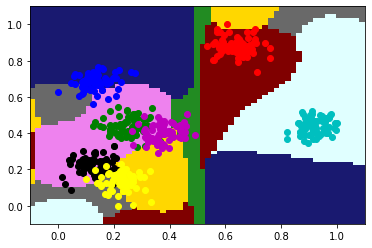

In [ ]:
vqc.load_weights('best_model.hdf5')
vqc(X_test)
N = 60
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
transformed = np.c_[x1.ravel(), x2.ravel()]
z = []
for i in range(len(transformed)):
    if i % 1000 == 0:
        print(i, len(transformed))
    val = convert_data([transformed[i]], qs, True)
    z.append(vqc(val).numpy()[0])

z = np.asarray(z)
z = np.argmax(z, axis=1)
z = z.reshape(x1.shape)
cmap_light = ListedColormap(['midnightblue', 'maroon', 'forestgreen', 'dimgray', 'gold', 'violet', 'lightcyan'])
plt.pcolormesh(x1, x2, z, cmap=cmap_light)
plt.scatter(blob_x[blob_y == 0][:,0], blob_x[blob_y == 0][:,1], label='0', color='blue')
plt.scatter(blob_x[blob_y == 1][:,0], blob_x[blob_y == 1][:,1], label='1', color='red')
plt.scatter(blob_x[blob_y == 2][:,0], blob_x[blob_y == 2][:,1], label='2', color='green')
plt.scatter(blob_x[blob_y == 3][:,0], blob_x[blob_y == 3][:,1], label='3', color='black')
plt.scatter(blob_x[blob_y == 4][:,0], blob_x[blob_y == 4][:,1], label='4', color='yellow')
plt.scatter(blob_x[blob_y == 5][:,0], blob_x[blob_y == 5][:,1], label='5', color='m')
plt.scatter(blob_x[blob_y == 6][:,0], blob_x[blob_y == 6][:,1], label='6', color='c')
plt.show()

In [ ]:
print(qnn_history[0].history["acc"])

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Testing


Epoch 00097: loss did not improve from 0.84571
11/13 [========================>.....] - ETA: 0s - loss: 1.6359 - acc: 0.4062
Epoch 00097: loss did not improve from 0.84571
12/13 [==========================>...] - ETA: 0s - loss: 1.6353 - acc: 0.4010
Epoch 00097: loss did not improve from 0.84571
13/13 [==============================] - 4s 283ms/step - loss: 1.6213 - acc: 0.4125 - val_loss: 1.6810 - val_acc: 0.3600
Epoch 98/100

Epoch 00098: loss did not improve from 0.84571
 1/13 [=>............................] - ETA: 2s - loss: 1.4374 - acc: 0.4062
Epoch 00098: loss did not improve from 0.84571
 2/13 [===>..........................] - ETA: 2s - loss: 1.7997 - acc: 0.3125
Epoch 00098: loss did not improve from 0.84571
 3/13 [=====>........................] - ETA: 1s - loss: 1.6980 - acc: 0.3646
Epoch 00098: loss did not improve from 0.84571
 4/13 [========>.....................] - ETA: 1s - loss: 1.8607 - acc: 0.3750
Epoch 00098: loss did not improve from 0.84571
 5/13 [==========>..

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100

Epoch 00001: loss improved from inf to 1.98222, saving model to best_model.hdf5
 1/13 [=>............................] - ETA: 8s - loss: 1.9822 - acc: 0.1250
Epoch 00001: loss did not improve from 1.98222

Epoch 00001: loss did not improve from 1.98222

Epoch 00001: loss improved from 1.98222 to 1.98042, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.98042 to 1.95799, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.95799 to 1.90899, saving model to best_model.hdf5
 6/13 [============>.................] - ETA: 0s - loss: 1.9090 - acc: 0.1875
Epoch 00001: loss did not improve from 1.90899

Epoch 00001: loss improved from 1.90899 to 1.90003, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.90003 to 1.87000, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.87000 to 1.83496, saving model to best_model.hdf5
10/13 [======================>.......] - ETA: 0s - loss: 1.8350 - acc: 0.2094
Epoch 00001: loss imp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100

Epoch 00001: loss improved from inf to 1.95167, saving model to best_model.hdf5
 1/13 [=>............................] - ETA: 8s - loss: 1.9517 - acc: 0.0312
Epoch 00001: loss improved from 1.95167 to 1.86786, saving model to best_model.hdf5

Epoch 00001: loss did not improve from 1.86786

Epoch 00001: loss did not improve from 1.86786

Epoch 00001: loss did not improve from 1.86786

Epoch 00001: loss did not improve from 1.86786

Epoch 00001: loss improved from 1.86786 to 1.86763, saving model to best_model.hdf5
 7/13 [===============>..............] - ETA: 0s - loss: 1.8676 - acc: 0.1607
Epoch 00001: loss improved from 1.86763 to 1.86201, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.86201 to 1.82372, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.82372 to 1.79900, saving model to best_model.hdf5
10/13 [======================>.......] - ETA: 0s - loss: 1.7990 - acc: 0.1844
Epoch 00001: loss improved from 1.79900 to 1.75678, saving

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100

Epoch 00001: loss improved from inf to 1.96285, saving model to best_model.hdf5
 1/13 [=>............................] - ETA: 8s - loss: 1.9629 - acc: 0.2500
Epoch 00001: loss did not improve from 1.96285

Epoch 00001: loss did not improve from 1.96285

Epoch 00001: loss did not improve from 1.96285

Epoch 00001: loss did not improve from 1.96285

Epoch 00001: loss improved from 1.96285 to 1.95223, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.95223 to 1.90131, saving model to best_model.hdf5
 7/13 [===============>..............] - ETA: 0s - loss: 1.9013 - acc: 0.1920
Epoch 00001: loss improved from 1.90131 to 1.84422, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.84422 to 1.77145, saving model to best_model.hdf5

Epoch 00001: loss did not improve from 1.77145

Epoch 00001: loss did not improve from 1.77145

Epoch 00001: loss improved from 1.77145 to 1.74211, saving model to best_model.hdf5
12/13 [==========================>...] -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100

Epoch 00001: loss improved from inf to 1.94440, saving model to best_model.hdf5
 1/13 [=>............................] - ETA: 7s - loss: 1.9444 - acc: 0.0625
Epoch 00001: loss did not improve from 1.94440

Epoch 00001: loss did not improve from 1.94440

Epoch 00001: loss improved from 1.94440 to 1.91752, saving model to best_model.hdf5

Epoch 00001: loss did not improve from 1.91752

Epoch 00001: loss did not improve from 1.91752

Epoch 00001: loss did not improve from 1.91752

Epoch 00001: loss did not improve from 1.91752
 8/13 [=================>............] - ETA: 0s - loss: 1.9530 - acc: 0.2227
Epoch 00001: loss improved from 1.91752 to 1.91570, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.91570 to 1.86694, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.86694 to 1.81226, saving model to best_model.hdf5
11/13 [========================>.....] - ETA: 0s - loss: 1.8123 - acc: 0.2869
Epoch 00001: loss improved from 1.81226 to 1.75

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100

Epoch 00001: loss improved from inf to 1.94654, saving model to best_model.hdf5
 1/13 [=>............................] - ETA: 11s - loss: 1.9465 - acc: 0.3438
Epoch 00001: loss did not improve from 1.94654

Epoch 00001: loss did not improve from 1.94654

Epoch 00001: loss did not improve from 1.94654

Epoch 00001: loss did not improve from 1.94654

Epoch 00001: loss improved from 1.94654 to 1.92849, saving model to best_model.hdf5
 6/13 [============>.................] - ETA: 0s - loss: 1.9285 - acc: 0.2656 
Epoch 00001: loss did not improve from 1.92849

Epoch 00001: loss improved from 1.92849 to 1.89954, saving model to best_model.hdf5

Epoch 00001: loss improved from 1.89954 to 1.85343, saving model to best_model.hdf5
 9/13 [===================>..........] - ETA: 0s - loss: 1.8534 - acc: 0.2465
Epoch 00001: loss improved from 1.85343 to 1.83458, saving model to best_model.hdf5
10/13 [======================>.......] - ETA: 0s - loss: 1.8346 - acc: 0.2344
Epoch 00001: los

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0, 0): ───@───Ry(q0)───Rz(q1)────────────@────────Ry(q14)───Rz(q15)─────────────@─────────Ry(q28)───Rz(q29)─────────────────────────────────────────────────────
           │                              │                                      │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───X────────@─────────Ry(q16)───Rz(q17)───X─────────@─────────Ry(q30)───Rz(q31)───────────────────────────────────────────
               │                                   │                                       │
(0, 2): ───────X────────@────────Ry(q4)───Rz(q5)───X─────────@─────────Ry(q18)───Rz(q19)───X─────────@─────────Ry(q32)───Rz(q33)─────────────────────────────────
                        │                                    │                                       │
(0, 3): ────────────────X────────@────────Ry(q6)───Rz(q7)────X─────────@─────────Ry(q20)───Rz(q21)───X─────────@─────────Ry(q34)───Rz(q35)───────────────────────
                                 │                                     │ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0, 0): ───@───Ry(q0)───Rz(q1)────────────@────────Ry(q14)───Rz(q15)─────────────@─────────Ry(q28)───Rz(q29)─────────────────────────────────────────────────────
           │                              │                                      │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───X────────@─────────Ry(q16)───Rz(q17)───X─────────@─────────Ry(q30)───Rz(q31)───────────────────────────────────────────
               │                                   │                                       │
(0, 2): ───────X────────@────────Ry(q4)───Rz(q5)───X─────────@─────────Ry(q18)───Rz(q19)───X─────────@─────────Ry(q32)───Rz(q33)─────────────────────────────────
                        │                                    │                                       │
(0, 3): ────────────────X────────@────────Ry(q6)───Rz(q7)────X─────────@─────────Ry(q20)───Rz(q21)───X─────────@─────────Ry(q34)───Rz(q35)───────────────────────
                                 │                                     │ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0, 0): ───@───Ry(q0)───Rz(q1)────────────@────────Ry(q14)───Rz(q15)─────────────@─────────Ry(q28)───Rz(q29)─────────────────────────────────────────────────────
           │                              │                                      │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───X────────@─────────Ry(q16)───Rz(q17)───X─────────@─────────Ry(q30)───Rz(q31)───────────────────────────────────────────
               │                                   │                                       │
(0, 2): ───────X────────@────────Ry(q4)───Rz(q5)───X─────────@─────────Ry(q18)───Rz(q19)───X─────────@─────────Ry(q32)───Rz(q33)─────────────────────────────────
                        │                                    │                                       │
(0, 3): ────────────────X────────@────────Ry(q6)───Rz(q7)────X─────────@─────────Ry(q20)───Rz(q21)───X─────────@─────────Ry(q34)───Rz(q35)───────────────────────
                                 │                                     │ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0, 0): ───@───Ry(q0)───Rz(q1)────────────@────────Ry(q14)───Rz(q15)─────────────@─────────Ry(q28)───Rz(q29)─────────────────────────────────────────────────────
           │                              │                                      │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───X────────@─────────Ry(q16)───Rz(q17)───X─────────@─────────Ry(q30)───Rz(q31)───────────────────────────────────────────
               │                                   │                                       │
(0, 2): ───────X────────@────────Ry(q4)───Rz(q5)───X─────────@─────────Ry(q18)───Rz(q19)───X─────────@─────────Ry(q32)───Rz(q33)─────────────────────────────────
                        │                                    │                                       │
(0, 3): ────────────────X────────@────────Ry(q6)───Rz(q7)────X─────────@─────────Ry(q20)───Rz(q21)───X─────────@─────────Ry(q34)───Rz(q35)───────────────────────
                                 │                                     │ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0, 0): ───@───Ry(q0)───Rz(q1)────────────@────────Ry(q14)───Rz(q15)─────────────@─────────Ry(q28)───Rz(q29)─────────────────────────────────────────────────────
           │                              │                                      │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───X────────@─────────Ry(q16)───Rz(q17)───X─────────@─────────Ry(q30)───Rz(q31)───────────────────────────────────────────
               │                                   │                                       │
(0, 2): ───────X────────@────────Ry(q4)───Rz(q5)───X─────────@─────────Ry(q18)───Rz(q19)───X─────────@─────────Ry(q32)───Rz(q33)─────────────────────────────────
                        │                                    │                                       │
(0, 3): ────────────────X────────@────────Ry(q6)───Rz(q7)────X─────────@─────────Ry(q20)───Rz(q21)───X─────────@─────────Ry(q34)───Rz(q35)───────────────────────
                                 │                                     │ 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

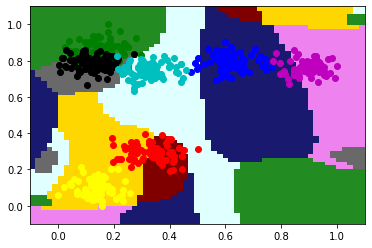

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
trials = 10
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
learning_rate = 3e-2
optimizer = tf.keras.optimizers.Adam(learning_rate)
epochs = 100
batch_size = 32
output = 7

for t in range(trials):
  blob_x, blob_y = datasets.make_blobs(500, centers=7, shuffle=True)
  blob_x = MinMaxScaler().fit_transform(blob_x)

  for p in range(5):
    blobx_train, blobx_test, bloby_train, bloby_test = train_test_split(blob_x, blob_y, test_size=.2, random_state=1)
    classical_NN = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output, activation="softmax")
    ])

    classical_NN.compile(loss=loss_function, optimizer=optimizer, metrics=['acc'])
    #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)
    history = classical_NN.fit(blobx_train, bloby_train, epochs=epochs, batch_size=batch_size, validation_data=(blobx_test, bloby_test), callbacks=[checkpoint])
    cmap_light = ListedColormap(['midnightblue', 'maroon', 'forestgreen', 'dimgray', 'gold', 'violet', 'lightcyan'])
    N = 400
    x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    transformed = np.c_[x1.ravel(), x2.ravel()]
    z = classical_NN(transformed)

    z = np.asarray(z)
    z = np.argmax(z, axis=1)
    z = z.reshape(x1.shape)
    plt.pcolormesh(x1, x2, z, cmap=cmap_light)

    plt.scatter(blob_x[blob_y == 0][:,0], blob_x[blob_y == 0][:,1], label='0', color='blue')
    plt.scatter(blob_x[blob_y == 1][:,0], blob_x[blob_y == 1][:,1], label='1', color='red')
    plt.scatter(blob_x[blob_y == 2][:,0], blob_x[blob_y == 2][:,1], label='2', color='green')
    plt.scatter(blob_x[blob_y == 3][:,0], blob_x[blob_y == 3][:,1], label='3', color='black')
    plt.scatter(blob_x[blob_y == 4][:,0], blob_x[blob_y == 4][:,1], label='4', color='yellow')
    plt.scatter(blob_x[blob_y == 5][:,0], blob_x[blob_y == 5][:,1], label='5', color='m')
    plt.scatter(blob_x[blob_y == 6][:,0], blob_x[blob_y == 6][:,1], label='6', color='c')
    plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/'+ str(t) + "nn_blob_" + str(p) + ".png")
    with open('/content/gdrive/MyDrive/Colab Notebooks/' + str(t) + 'nn' + str(p) + '.txt', 'w') as f:
      f.write(str(history.history))
    files.download('/content/gdrive/MyDrive/Colab Notebooks/'+ str(t) + "nn_blob_" + str(p) + ".png")

  for p in range(5):
    qs = [cirq.GridQubit(0, i) for i in range(7)]
    d = 3
    X_train, X_test, y_train, y_test = encode(blob_x, blob_y, qs)
    c = model_circuit(qs, d)
    print(c)

    readout_operators = [cirq.Z(i) for i in qs]
    inputs = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
    #layer1 = tfq.layers.PQC(c, readout_operators, repetitions=32, differentiator=tfq.differentiators.ParameterShift())(inputs)
    layer1 = tfq.layers.PQC(c, readout_operators, differentiator=tfq.differentiators.Adjoint())(inputs)
    vqc = tf.keras.models.Model(inputs=inputs, outputs=layer1)
    vqc.compile(loss=loss_function, optimizer=optimizer, metrics=['acc'])
    #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint("best_qnn_model.hdf5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

    history = vqc.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint])
    vqc.load_weights('best_qnn_model.hdf5')
    N = 60
    x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    transformed = np.c_[x1.ravel(), x2.ravel()]
    z = []
    for i in range(len(transformed)):
        if i % 1000 == 0:
            print(i, len(transformed))
        val = convert_data([transformed[i]], qs, True)
        z.append(vqc(val).numpy()[0])

    z = np.asarray(z)
    z = np.argmax(z, axis=1)
    z = z.reshape(x1.shape)
    cmap_light = ListedColormap(['midnightblue', 'maroon', 'forestgreen', 'dimgray', 'gold', 'violet', 'lightcyan'])
    plt.pcolormesh(x1, x2, z, cmap=cmap_light)
    plt.scatter(blob_x[blob_y == 0][:,0], blob_x[blob_y == 0][:,1], label='0', color='blue')
    plt.scatter(blob_x[blob_y == 1][:,0], blob_x[blob_y == 1][:,1], label='1', color='red')
    plt.scatter(blob_x[blob_y == 2][:,0], blob_x[blob_y == 2][:,1], label='2', color='green')
    plt.scatter(blob_x[blob_y == 3][:,0], blob_x[blob_y == 3][:,1], label='3', color='black')
    plt.scatter(blob_x[blob_y == 4][:,0], blob_x[blob_y == 4][:,1], label='4', color='yellow')
    plt.scatter(blob_x[blob_y == 5][:,0], blob_x[blob_y == 5][:,1], label='5', color='m')
    plt.scatter(blob_x[blob_y == 6][:,0], blob_x[blob_y == 6][:,1], label='6', color='c')
    plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/'+ str(t) + "qnn_blob_" + str(p) + ".png")
    with open('/content/gdrive/MyDrive/Colab Notebooks/' + str(t) + 'qnn' + str(p) + '.txt', 'w') as f:
      f.write(str(history.history))
    files.download('/content/gdrive/MyDrive/Colab Notebooks/'+ str(t) + "qnn_blob_" + str(p) + ".png")

In [ ]:
import pickle

In [ ]:
with open('qnn_histories.pkl', 'wb') as f:
  histories = []
  for x in all_qnn_history:
    for y in x:
      histories.append(y.history)
  pickle.dump(histories, f)
  f.close

In [ ]:
with open('0qnn_params.pkl', 'rb') as f:
  histories = pickle.load(f)
  f.close
print(histories)

In [ ]:
with open('nn_histories.pkl', 'wb') as f:
  histories = []
  for x in all_nn_history:
    for y in x:
      histories.append(y.history)
  pickle.dump(histories, f)
  f.close

In [ ]:
with open('0nn_params.pkl', 'rb') as f:
  histories = pickle.load(f)
  f.close

In [ ]:
print(histories)

# Analyzing the Data

In [ ]:
import json
import ast
all_average_nn = 0
high_average_nn = 0
all_average_qnn = 0
high_average_qnn = 0

for y in range(10):
  for x in range(5):
    with open(f'/content/drive/MyDrive/Classical vs Quantum Machine Supervised Learning/{y}nn{x}.txt', 'r') as f:
      file_nn = f.read()
    file_nn = ast.literal_eval(file_nn)
    average_nn = np.mean(file_nn['acc'])
    high_nn = np.amax(file_nn['acc'])
    all_average_nn += average_nn
    high_average_nn += high_nn

    with open(f'/content/drive/MyDrive/Classical vs Quantum Machine Supervised Learning/{y}qnn{x}.txt', 'r') as f:
      file_qnn = f.read()
    file_qnn = ast.literal_eval(file_qnn)
    average_qnn = np.mean(file_qnn['acc'])
    high_qnn = np.amax(file_qnn['acc'])
    print(high_qnn)
    all_average_qnn += average_qnn
    high_average_qnn += high_qnn
  all_average_nn /= 5
  all_average_qnn /= 5
  high_average_nn /= 5
  high_average_qnn /= 5






0.7074999809265137
0.7950000166893005
0.49000000953674316
0.7425000071525574
0.8650000095367432
0.7300000190734863
0.8274999856948853
0.6899999976158142
0.6949999928474426
0.6100000143051147
0.5774999856948853
0.7149999737739563
0.48750001192092896
0.5950000286102295
0.7574999928474426
0.375
0.7850000262260437
0.5849999785423279
0.8450000286102295
0.5625
0.6949999928474426
0.8025000095367432
0.5924999713897705
0.574999988079071
0.8450000286102295
0.8675000071525574
0.75
0.7975000143051147
0.7450000047683716
0.9399999976158142
0.7099999785423279
0.9150000214576721
0.6524999737739563
0.8299999833106995
0.75
0.7149999737739563
0.4699999988079071
0.7749999761581421
0.7099999785423279
0.42250001430511475
0.6474999785423279
0.8199999928474426
0.8675000071525574
0.8349999785423279
0.6175000071525574
0.8974999785423279
0.6200000047683716
0.7200000286102295
0.6424999833106995
0.8849999904632568


In [ ]:
print(all_average_nn)
print(all_average_qnn)
print(high_average_nn)
print(high_average_qnn)


0.8623620011746883
0.486898499473557
0.9212500035762787
0.7109999984502793
